In [ ]:
# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_data[merged_data["Mouse ID"]== 'g989']
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[merged_data["Mouse ID"] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean, 
                                 "Median Tumor Volume": median, 
                                 "Tumor Volume Variance": variance, 
                                 "Tumor Volume Std. Dev.": stdv, 
                                 "Tumor Volume Std. Err.": sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df_agg = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(
    columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
summary_stats_df_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

def displayBarChart(library):
    mice_treatment_total_plot= cleaned_df.groupby(['Drug Regimen'])['Mouse ID'].count() 
    if library == "Pandas":
        mice_treatment_total_plot.sort_values(ascending=False).plot(kind="bar", figsize=(10,8))
    elif library == 'Pyplot':
        plt.figure(figsize=(10, 7))
        plt.bar(mice_treatment_total_plot.index, mice_treatment_total_plot.sort_values(ascending=False))
    else:
        print("Undefined Library!")
        return
        
    plt.title("Total Number of Mice for each Treatment")
    plt.xlabel("Drug Regimen",fontsize=16)
    plt.ylabel("# of Observed Mouse Timepoints",fontsize=16)
    plt.xticks(rotation=45, ha="right") 
    plt.show()
    return

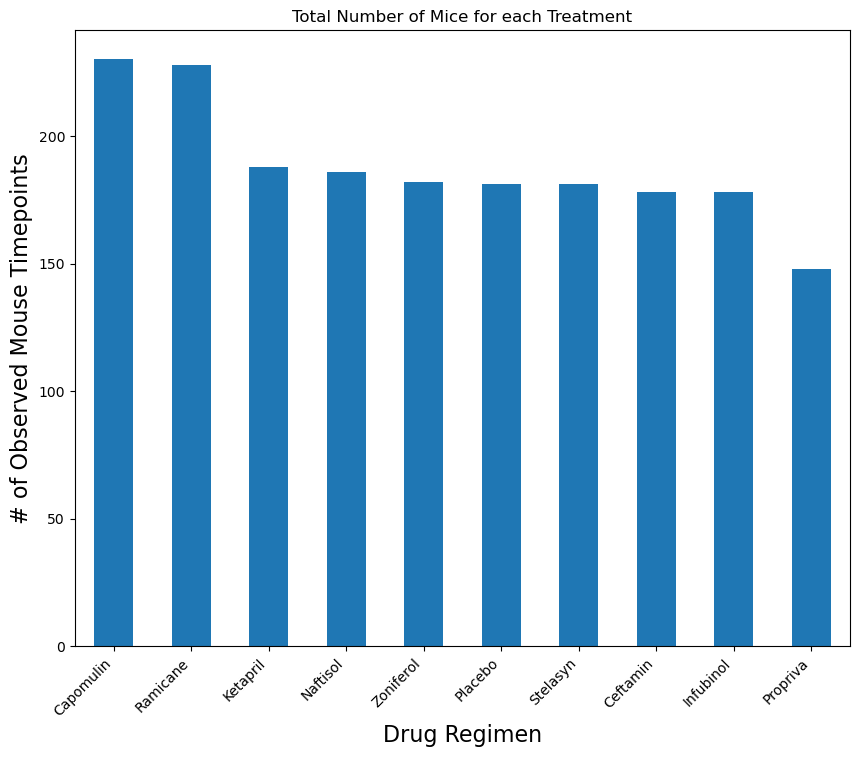

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
displayBarChart("Pandas")

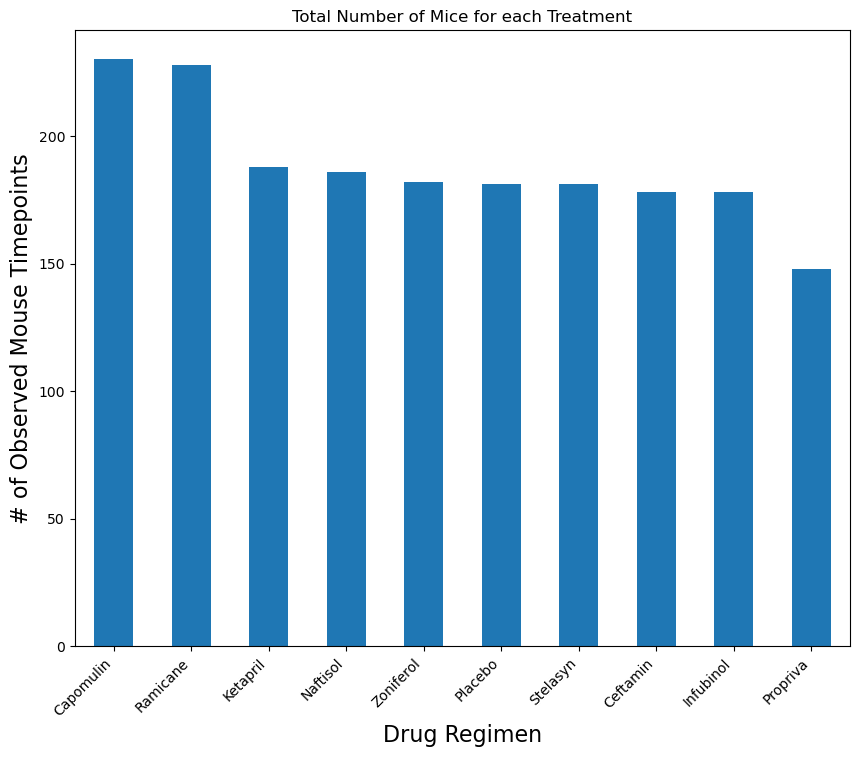

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
displayBarChart("Pandas")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
def displayPieChart(library):
    plt.figure(figsize=(7, 7))
    sex_distribution = cleaned_df.groupby(['Sex'])['Sex'].count()
    if library == "Pandas":
        sex_distribution.plot.pie(startangle=0,autopct='%1.1f%%', figsize=(8, 8), fontsize=16)
    elif library == 'Pyplot':
        plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', textprops={'fontsize': 16}) 
    else:
        print("Undefined Library!")
        return
    plt.ylabel("Sex",fontsize=16)
    plt.show()
    return

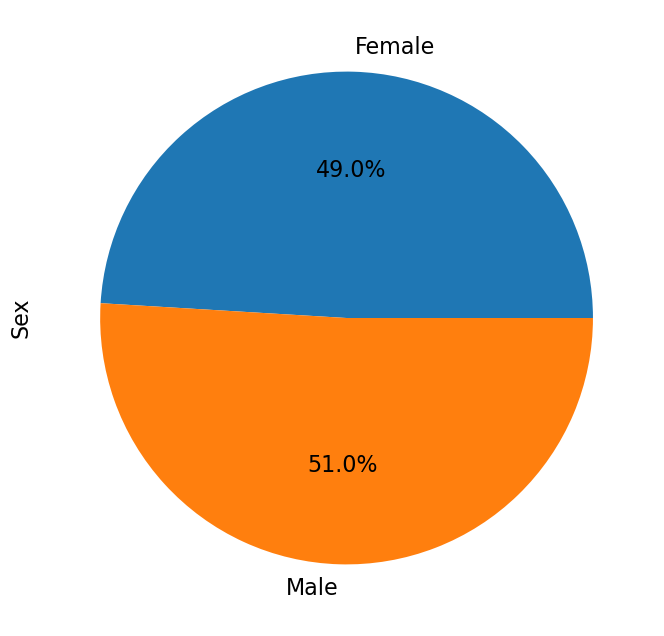

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
displayPieChart("Pandas")

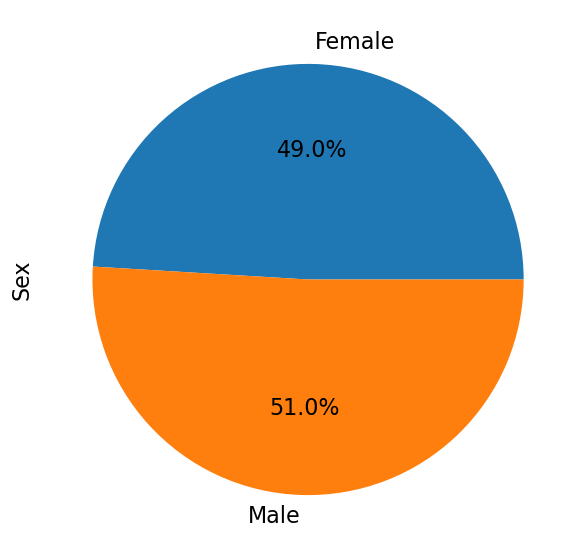

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
displayPieChart("Pyplot")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    
def calculate_IQR(subset):
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    
# Determine outliers using upper and lower bounds
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    return outliers

In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:
    subset = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)

    outliers = calculate_IQR(subset)
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


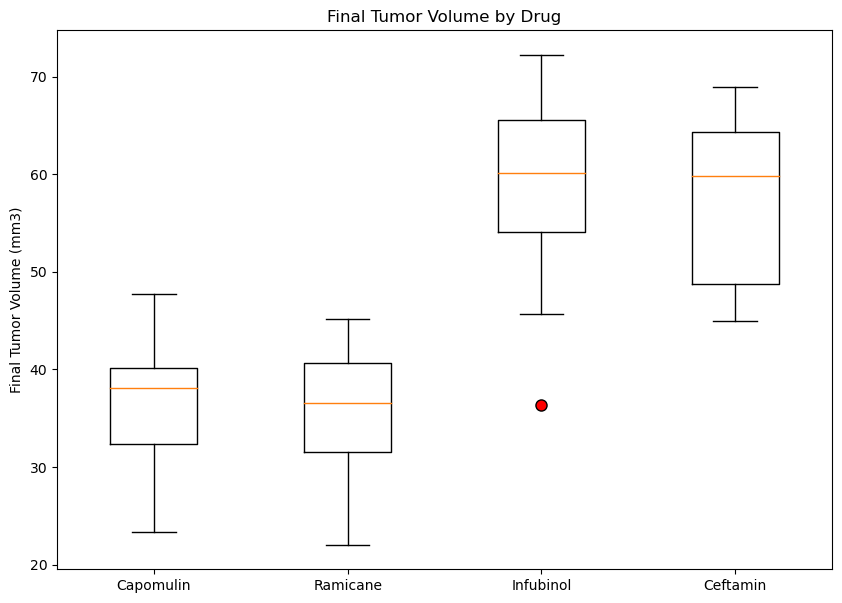

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 7))
props = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumor_vol_data, flierprops=props)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

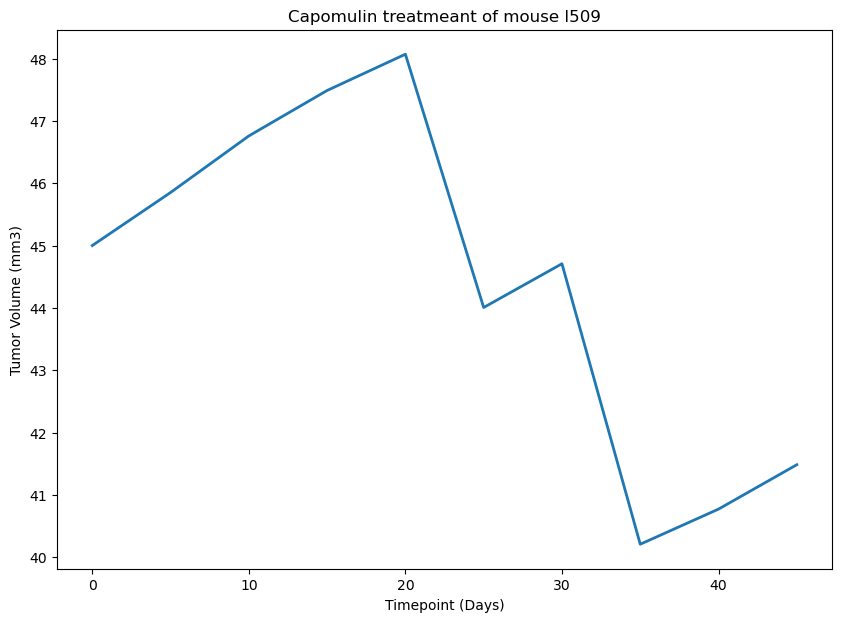

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
new_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
x_tp = new_df["Timepoint"] 
y_tv_size = new_df["Tumor Volume (mm3)"] 
plt.figure(figsize=(10, 7))
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_tp, y_tv_size,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

In [20]:
def get_average_tumor(cleaned_df):
    capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

    # Find average tumor volume for each mouse
    avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
    return capomulin_df, avg_vol_df

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df, avg_vol_df = get_average_tumor(cleaned_df)

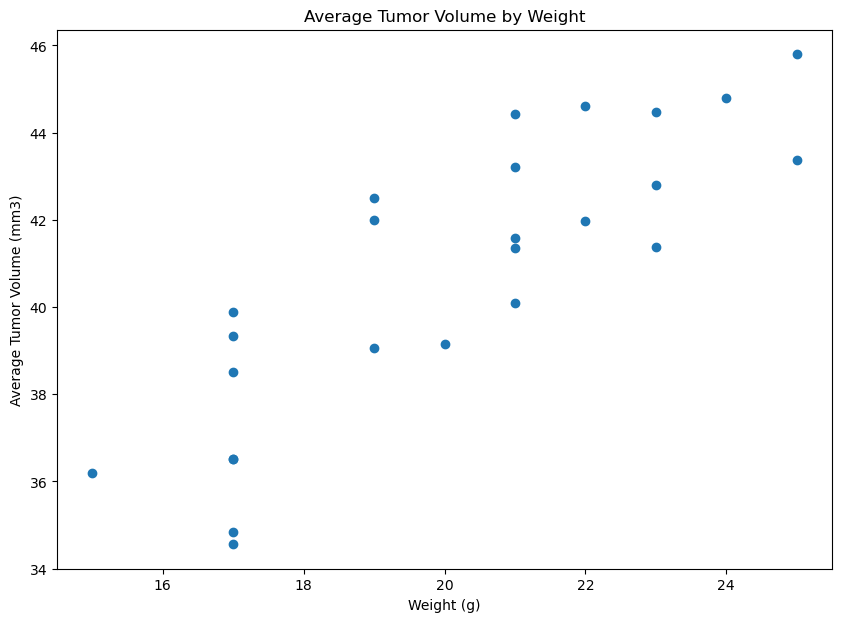

In [22]:
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
x_weight = final_df['Weight (g)']
y_tumor_vol = final_df['avg_tumor_vol']
plt.figure(figsize=(10, 7))
plt.scatter(x_weight, y_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

In [26]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [31]:
from scipy.stats import linregress

In [32]:
# Assuming you have the 'cleaned_df' DataFrame defined somewhere in the notebook

import pandas as pd
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = capomulin_data.groupby('Mouse ID').agg(Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), 
                                                   Weight=('Weight (g)', 'first')).reset_index()
print(avg_vol_df.head())

  Mouse ID  Average_Tumor_Volume  Weight
0     b128             41.963636      22
1     b742             40.083699      21
2     f966             36.505973      17
3     g288             41.990097      19
4     g316             44.613344      22


Correlation coefficient: 0.8419363424694721
Linear regression model: y = 0.12754359033201326x + 21.55216053268501


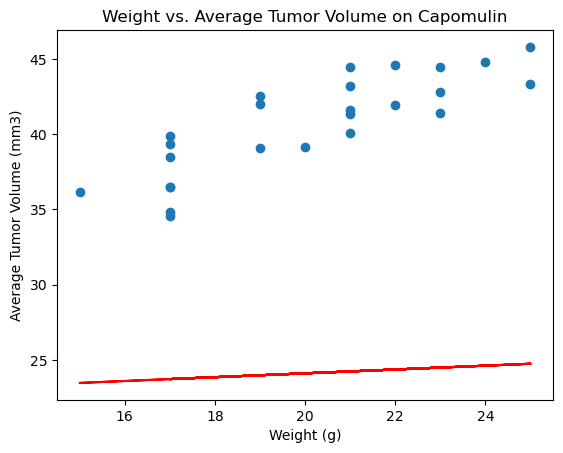

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = avg_vol_df['Weight'].corr(avg_vol_df['Average_Tumor_Volume'])
print(f"Correlation coefficient: {correlation}")



s, i, r, p, s = linregress(avg_vol_df['Weight'], avg_vol_df['Average_Tumor_Volume'])
print(f"Linear regression model: y = {s}x + {i}")

plt.scatter(avg_vol_df['Weight'], avg_vol_df['Average_Tumor_Volume'])
plt.plot(avg_vol_df['Weight'], i + s * avg_vol_df['Weight'], 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs. Average Tumor Volume on Capomulin')
plt.show()


